In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

Reading from our Test and Training sets from the scraping we did from NBA combine

In [75]:
test = pd.read_csv("TestSet.csv")
train = pd.read_csv("TrainSet.csv")

test_names=test["Name"]
train_names=train["Name"]

test =test.drop(["Name","Year","Pos","GP"],axis=1) #Drops categorical variables
train =train.drop(["Name","Year","Pos","GP"],axis=1)
train =train.dropna()
test= test.dropna()

Removing success categorical var that was a 0 or 1 for if a player played a certain number of games (174) total games

In [76]:
train_X = train.drop(['Suc'], axis=1)
train_Y = train['Suc']
test_X = test.drop(["Suc"],axis=1)
test_Y = test["Suc"]

Correlation Table

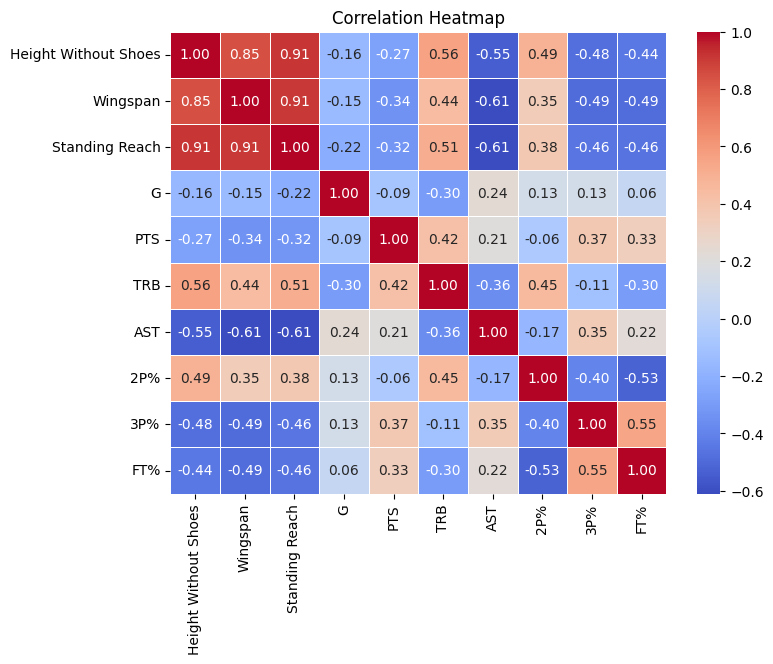

In [77]:
correlation_matrix = train_X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [78]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(train_X, train_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [79]:
y_pred_test = logreg.predict(test_X)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test_Y, y_pred_test)))

Model accuracy score: 0.6000


In [80]:
cm = confusion_matrix(test_Y, y_pred_test)

print('Confusion matrix\n\n', cm)
TP,TN,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]

Support = (cm[0,0]*-1+cm[1,1]*-1+10*cm[0,1]+cm[1,0]*10)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1=(2*Precision*Recall)/(Precision+Recall)
print("Precision: ",Precision.round(),"\nRecall: ", Recall.round(3), "\nF1: ",F1.round(3),"\nSupport: ",Support.round(3))

Confusion matrix

 [[8 1]
 [5 1]]
Precision:  1.0 
Recall:  0.615 
F1:  0.727 
Support:  51


Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(train_X, train_Y)

# Predict the Test set results

y_pred = rfc.predict(test_X)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_Y, y_pred)))

Model accuracy score with 10 decision-trees : 0.6000


In [82]:
cm = confusion_matrix(test_Y, y_pred_test)

print('Confusion matrix\n\n', cm)
TP,TN,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]

Support = (cm[0,0]*-1+cm[1,1]*-1+10*cm[0,1]+cm[1,0]*10)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1=(2*Precision*Recall)/(Precision+Recall)
print("Precision: ",Precision.round(),"\nRecall: ", Recall.round(3), "\nF1: ",F1.round(3),"\nSupport: ",Support.round(3))

Confusion matrix

 [[8 1]
 [5 1]]
Precision:  1.0 
Recall:  0.615 
F1:  0.727 
Support:  51


<BarContainer object of 10 artists>

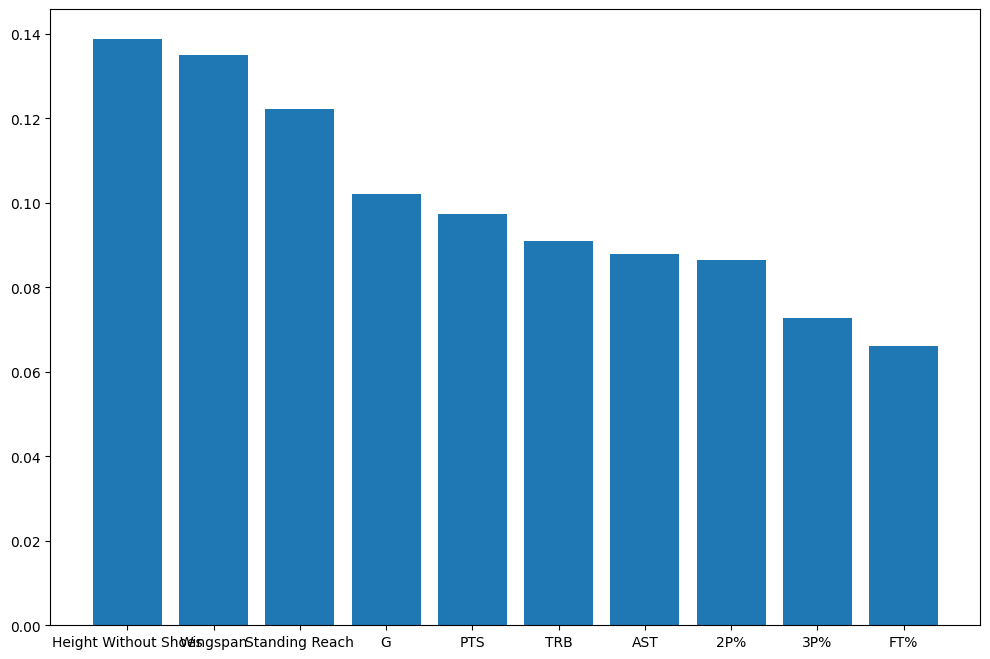

In [83]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(train_X, train_Y)

feature_scores = pd.Series(clf.feature_importances_, index=train_X.columns).sort_values(ascending=False)

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
plt.bar(train_X.columns, feature_scores)


Support Vector Machine

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

svm_model = SVC(kernel='rbf', random_state=0)

svm_model.fit(train_X_scaled, train_Y)

y_pred_test = svm_model.predict(test_X_scaled)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test_Y, y_pred_test)))

Model accuracy score: 0.6000


In [85]:
cm = confusion_matrix(test_Y, y_pred_test)

print('Confusion matrix\n\n', cm)
TP,TN,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]

Support = (cm[0,0]*-1+cm[1,1]*-1+10*cm[0,1]+cm[1,0]*10)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1=(2*Precision*Recall)/(Precision+Recall)
print("Precision: ",Precision.round(),"\nRecall: ", Recall.round(3), "\nF1: ",F1.round(3),"\nSupport: ",Support.round(3))

Confusion matrix

 [[9 0]
 [6 0]]
Precision:  1.0 
Recall:  0.6 
F1:  0.75 
Support:  51
